In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
data = pd.read_csv('insurance_data.csv')

In [4]:
data.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [5]:
x = data[['age']]
y = data[['bought_insurance']]

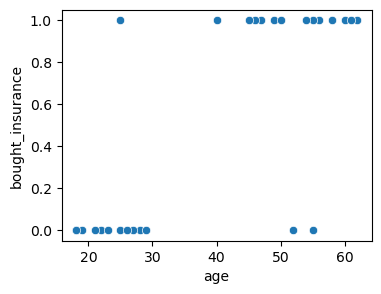

In [6]:
plt.figure(figsize = (4,3))
sns.scatterplot(x = 'age', y = 'bought_insurance',data = data)
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train,x_test, y_train,y_test = train_test_split(x,y,train_size=0.9,random_state=42)

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
lo = LogisticRegression()

In [11]:
lo.fit(x_train,y_train)

C:\Users\siddh\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [12]:
lo.predict([[12]])

C:\Users\siddh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [13]:
lo.score(x_test,y_test) *100

100.0

# Excercise

In [15]:
data1 = pd.read_csv('HR_comma_sep.csv')

In [16]:
data1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [166]:
list = ['satisfaction_level','average_montly_hours','promotion_last_5years', 'salary']

In [35]:
left = data1[data1.left == 1]

In [39]:
left.shape

(3571, 10)

In [41]:
retain = data1[data1.left == 0]

In [43]:
retain.shape

(11428, 10)

In [75]:
data1.groupby('left').mean(numeric_only=True) *100

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,66.680959,71.547340,378.666433,19906.020301,338.003150,17.500875,2.625131
1,44.009801,71.811257,385.550266,20741.921031,387.650518,4.732568,0.532064


In [142]:
# data1.groupby(['salary','left']).size().unstack().plot(kind = 'bar')

<Axes: xlabel='salary'>

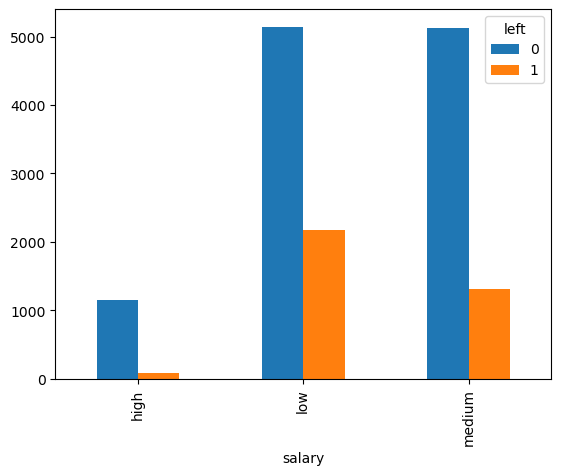

In [138]:
pd.crosstab(data1.salary,data1.left).plot(kind = 'bar')

In [148]:
# data1.groupby(['Department','left']).size().unstack()

<Axes: xlabel='Department'>

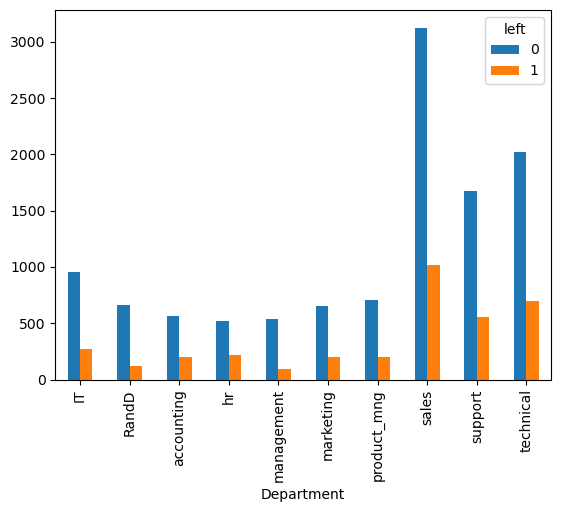

In [150]:
pd.crosstab(data1.Department,data1.left).plot(kind = 'bar')

In [164]:
pd.crosstab(data1.Department,data1.left,normalize=True) *100

left,0,1
Department,,
IT,6.360424,1.820121
RandD,4.440296,0.806720
accounting,3.753584,1.360091
hr,3.493566,1.433429
management,3.593573,0.606707
marketing,4.366958,1.353424
product_mng,4.693646,1.320088
sales,20.841389,6.760451
support,11.160744,3.700247


In [171]:
newdf = data1[list]

In [175]:
newdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [177]:
from sklearn.preprocessing import LabelEncoder

In [179]:
la = LabelEncoder()

In [183]:
newdf['salary'] = la.fit_transform(newdf['salary'])

C:\Users\siddh\AppData\Local\Temp\ipykernel_4452\3300762243.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['salary'] = la.fit_transform(newdf['salary'])


In [185]:
newdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,1
1,0.80,262,0,2
2,0.11,272,0,2
3,0.72,223,0,1
4,0.37,159,0,1


In [187]:
x = newdf

In [189]:
y = data1.left

In [199]:
import numpy as np

In [207]:
# data1['left_jitter'] = data1['left'] + np.random.uniform(-0.1, 0.1, size=len(data1))

In [209]:
# for feature in list:
#     plt.figure(figsize=(6, 4))
#     sns.scatterplot(x=data1[feature], y=data1['left_jitter'], alpha=0.5)
#     plt.xlabel(feature)
#     plt.ylabel("Left (with jitter)")
#     plt.title(f'Scatter Plot of {feature} vs Left')
#     plt.show()

In [211]:
from sklearn.model_selection import train_test_split

In [213]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=42)

In [215]:
from sklearn.linear_model import LogisticRegression

In [217]:
lo = LogisticRegression()

In [219]:
lo.fit(x_train,y_train)

LogisticRegression()

In [223]:
lo.score(x_test,y_test)*100

75.83333333333333